# 爬虫

| 参数 | 对应的名称       |
| ---- | ---------------- |
| f23  | 市净率           |
| f14  | 股票名称         |
| f12  | 股票代码         |
| f9   | 市盈率           |
| f2   | 最新价           |
| f3   | 涨跌幅（百分比） |
| f4   | 涨跌额           |
| f5   | 成交量           |
| f6   | 成交额           |
| f7   | 振幅             |
| f10  | 量比             |
| f15  | 最高             |
| f16  | 最低             |
| f17  | 今开             |
| f18  | 昨收             |

## 爬取东方财富网股票信息

In [ ]:
import json
import pandas as pd
import re
import requests

dic = {
    'f23': '市净率',
    'f14': '股票名称',
    'f12': '股票代码',
    'f9': '市盈率',
    'f2': '最新价',
    'f3': '涨跌幅（百分比）',
    'f4': '涨跌额',
    'f5': '成交量',
    'f6': '成交额',
    'f7': '振幅',
    'f10': '量比',
    'f15': '最高',
    'f16': '最低',
    'f17': '今开',
    'f18': '昨收'
}


def func(request_url):
    res = requests.get(request_url, headers=headers)
    res = res.text
    regex = re.compile(r"(?=\()(.*)(?<=\))")

    jsonString = regex.findall(res)[-1]
    jsonString = json.loads(jsonString.strip('()'))['data']['diff']

    df = pd.DataFrame(jsonString)
    df = df.rename(columns=dic)
    df = df.drop(['f1'], axis=1)

    return df

In [ ]:
import requests

headers = {
    'User-Agent':
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:100.0) Gecko/20100101 Firefox/100.0',
    'Cookie': 'bid=03QzRATVvZI; douban-fav-remind=1; __gads=ID=235109b723938ba4-2224407c19d8000c:T=1668039578:RT=1668039578:S=ALNI_MYFFJ5HU2_bVR7eqoxZtDCAQBeaiA; __gpi=UID=00000b78f6a2bf6c:T=1668039578:RT=1668325134:S=ALNI_MZJXHay5I4KEyvwl_-VLHskRpbIyA; __utma=30149280.1863681919.1668039577.1668325999.1668341717.4; __utmz=30149280.1668325999.3.3.utmcsr=baidu|utmccn=(organic)|utmcmd=organic; push_noty_num=0; push_doumail_num=0; __utmv=30149280.17848; gr_user_id=dccf8534-bc90-42d8-b1be-c133a8b1daf7; ap_v=0,6.0; __utmb=30149280.9.8.1668341833502; __utmc=30149280; __utmt_douban=1; __utmt_t1=1; RT=s=1668341920729&r=https%3A%2F%2Fbook.douban.com%2Fsubject%2F6025373%2Fcomments%2F%3Fstart%3D220%26amp%3Blimit%3D20%26amp%3Bstatus%3DP%26amp%3Bsort%3Dnew_score; dbcl2="178484147:wK+jx5QTARI"; ck=PDDZ'
}
request_url = 'https://datacenter-web.eastmoney.com/api/data/v1/get?callback=jQuery1123041918013343973093_1680531566220&sortColumns=REPORT_DATE&sortTypes=-1&pageSize=10&pageNumber=1&columns=ALL&filter=%28SECURITY_CODE%3D%22300624%22%29&reportName=RPT_FCI_PERFORMANCEE'
res = requests.get(request_url, headers=headers)
res

In [ ]:
res.text

In [ ]:
# 主要内容
import requests  # 引入库

headers = {
    'User-Agent':
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:100.0) Gecko/20100101 Firefox/100.0',
    'Cookie': 'bid=03QzRATVvZI; douban-fav-remind=1; __gads=ID=235109b723938ba4-2224407c19d8000c:T=1668039578:RT=1668039578:S=ALNI_MYFFJ5HU2_bVR7eqoxZtDCAQBeaiA; __gpi=UID=00000b78f6a2bf6c:T=1668039578:RT=1668325134:S=ALNI_MZJXHay5I4KEyvwl_-VLHskRpbIyA; __utma=30149280.1863681919.1668039577.1668325999.1668341717.4; __utmz=30149280.1668325999.3.3.utmcsr=baidu|utmccn=(organic)|utmcmd=organic; push_noty_num=0; push_doumail_num=0; __utmv=30149280.17848; gr_user_id=dccf8534-bc90-42d8-b1be-c133a8b1daf7; ap_v=0,6.0; __utmb=30149280.9.8.1668341833502; __utmc=30149280; __utmt_douban=1; __utmt_t1=1; RT=s=1668341920729&r=https%3A%2F%2Fbook.douban.com%2Fsubject%2F6025373%2Fcomments%2F%3Fstart%3D220%26amp%3Blimit%3D20%26amp%3Bstatus%3DP%26amp%3Bsort%3Dnew_score; dbcl2="178484147:wK+jx5QTARI"; ck=PDDZ'
}  # 请求头，表明身份
request_url = 'https://datacenter-web.eastmoney.com/api/data/v1/get?callback=jQuery1123041918013343973093_1680531566220&sortColumns=REPORT_DATE&sortTypes=-1&pageSize=10&pageNumber=1&columns=ALL&filter=%28SECURITY_CODE%3D%22300624%22%29&reportName=RPT_FCI_PERFORMANCEE'  # 请求URl，表示要什么数据

res = requests.get(request_url, headers=headers)  # 把要写的内容填到这个里面,res是返回的对象

content = res.text  # 这个就是你需要的数据，但是是原始数据

import re  # 导入库

regex = re.compile(r"(?=\()(.*)(?<=\))")  # 创建正则表达式

jsonString = regex.findall(content)[-1]  # 初步处理以后的数据

jsonString = json.loads(jsonString.strip('()'))['result']['data']  # json.loads()函数，把你需要的数据创建成为字典。你再观察一下字典。

"""
比如这个字典是这样的：
a = {
'a' = 1,
'b' = 2
}
你通过a['a']就可以访问到1这个数据。
存在多层嵌套的情况你就多写几个
"""

## 爬取知乎评论

In [ ]:
import requests
import json

headers = {
    'User-Agent':
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:100.0) Gecko/20100101 Firefox/100.0',
    'Cookie': 'bid=03QzRATVvZI; douban-fav-remind=1; __gads=ID=235109b723938ba4-2224407c19d8000c:T=1668039578:RT=1668039578:S=ALNI_MYFFJ5HU2_bVR7eqoxZtDCAQBeaiA; __gpi=UID=00000b78f6a2bf6c:T=1668039578:RT=1668325134:S=ALNI_MZJXHay5I4KEyvwl_-VLHskRpbIyA; __utma=30149280.1863681919.1668039577.1668325999.1668341717.4; __utmz=30149280.1668325999.3.3.utmcsr=baidu|utmccn=(organic)|utmcmd=organic; push_noty_num=0; push_doumail_num=0; __utmv=30149280.17848; gr_user_id=dccf8534-bc90-42d8-b1be-c133a8b1daf7; ap_v=0,6.0; __utmb=30149280.9.8.1668341833502; __utmc=30149280; __utmt_douban=1; __utmt_t1=1; RT=s=1668341920729&r=https%3A%2F%2Fbook.douban.com%2Fsubject%2F6025373%2Fcomments%2F%3Fstart%3D220%26amp%3Blimit%3D20%26amp%3Bstatus%3DP%26amp%3Bsort%3Dnew_score; dbcl2="178484147:wK+jx5QTARI"; ck=PDDZ'
}

request_url = r'https://www.zhihu.com/api/v4/comment_v5/answers/1420850902/root_comment?order_by=score&limit=20&offset='

res = requests.get(request_url, headers)
res

In [ ]:
res.text

In [ ]:
dick = json.loads(res.text)

In [ ]:
type(dick)

In [ ]:
# dick['data'][1]
comment_list = []
for data in dick['data']:
    comment_list.append(data['content'])
    for child_comment in data['child_comments']:
        comment_list.append(child_comment['content'])

comment_list

In [ ]:
dick['data'][1]['child_comments'][-1]['content']

In [ ]:
string = dick['paging']['is_end']
# requests.get(string,headers=headers).content
type(string)

In [ ]:
r'https://www.zhihu.com/api/v4/comment_v5/answers/591855450/root_comment?order_by=score&limit=20&offset='


def zhihu_comment(url):
    content = requests.get(url, headers=headers)
    dick = json.loads(content.content)
    comment_list = []
    for data in dick['data']:
        comment_list.append(data['content'])
        for child_comment in data['child_comments']:
            comment_list.append(child_comment['content'])


    while not dick['paging']['is_end']:
        next_url = dick['paging']['next']
        dick = json.loads(requests.get(next_url, headers=headers).content)
        for data in dick['data']:
            comment_list.append(data['content'])
            for child_comment in data['child_comments']:
                comment_list.append(child_comment['content'])

    return comment_list

In [ ]:
li = zhihu_comment(r'https://www.zhihu.com/api/v4/comment_v5/answers/2649393382/root_comment?order_by=score&limit=20&offset=')

In [ ]:
len(li)

In [ ]:
with open('zhihu.txt','w',encoding='utf-8') as f:
    for i in li:
        f.write(i+'\n')

## 爬取B站评论

In [ ]:
cookie = "buvid3=24F31FD6-220B-2314-1791-29B4B19101ED38432infoc; b_nut=1673523238; i-wanna-go-back=-1; b_ut=5; _uuid=4A17E755-4E4A-FC3F-10F3F-6DC2CD56746439320infoc; buvid_fp=7e77a1e02fb82712142f58f8bf266314; buvid4=75762ED4-0F59-F6E5-CC13-AF2D0A78746839991-023011219-Yy4vm8XQ%2BSYNBA%2FUziFw6g%3D%3D; fingerprint=08c90d6be64a7cd26d231ad186351599; buvid_fp_plain=undefined; SESSDATA=9494fbc9%2C1689075608%2C7bd24%2A11; bili_jct=3086cea8aed34ae2abe38fd23845c678; DedeUserID=203460504; DedeUserID__ckMd5=79d56fdab8baf61b; nostalgia_conf=-1; CURRENT_FNVAL=4048; rpdid=|(u))u~)uRJJ0J'uY~JlkJYJR; PVID=1; LIVE_BUVID=AUTO8416761100285718; header_theme_version=CLOSE; home_feed_column=5; bp_video_offset_203460504=778836669434429400; CURRENT_PID=49587320-d2f4-11ed-84e7-0d474b46558f; b_lsid=10FE652FA_18764615EA2; share_source_origin=QQ; bsource=share_source_qqchat; sid=5q9k8s03"


In [ ]:
bilibili_url = r"https://api.bilibili.com/x/v2/reply/main?csrf=3086cea8aed34ae2abe38fd23845c678&mode=3&next=0&oid=936714657&plat=1&seek_rpid=&type=1"

res = requests.get(bilibili_url,cookies=cookie,headers = headers)

In [ ]:
dic = json.loads(res.content)

In [ ]:
dic

In [ ]:
res = requests.get(r'https://www2.lightpollutionmap.info/QueryRaster/?qk=MTY4MTAxODU5NDk0Njtpc3Vja2RpY2tzOik%3D&ql=wa_2015&qt=point&qd=113.6832100040374%2C34.747523633102915',headers = headers)

In [ ]:
res.content

In [ ]:
import requests
import json

headers = {
    'User=Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:107.0) Gecko/20100101 Firefox/107.0',
    'Cookie':'PC_TOKEN=de15cf9de8; SUBP=0033WrSXqPxfM725Ws9jqgMF55529P9D9WW.ah1ZCkrZli1KX4braBpx5JpX5KzhUgL.Fo-4eK54eh.ReKe2dJLoI7f_dcvVqcyDdsBEehz7; WBPSESS=Q4mocWB9j3toNvru27wa1TepLPXtAnu2XAXlhijHDmRDo3c7fhos1X1YsQ5sCQmRNcVN9W4HihTP2x1ITr_j-_bW93ayUrSLA82jgoc18sP1EvFZtdCP_1y9FluueQF5vY73jyYNeLx9uHFkOiAdvQ==; SINAGLOBAL=2129311165616.0813.1669013358502; ULV=1669013911487:2:2:2:5684428808012.402.1669013911365:1669013358503; ALF=1700549732; SUB=_2A25Of1C2DeRhGeNH6lIY8CfEyj-IHXVtDcV-rDV8PUNbmtAfLRTWkW9NSsnp9C-go4Q2I-P2WKyciynFznYmW2Ve; SSOLoginState=1669013734; XSRF-TOKEN=11QMGfwtyRXSFeqt4EtiCVXV; _s_tentry=weibo.com; Apache=5684428808012.402.1669013911365'
}


bilibili_url = r"https://api.bilibili.com/x/v2/reply/main?csrf=3086cea8aed34ae2abe38fd23845c678&mode=3&next=0&oid=254853690&plat=1&seek_rpid=&type=1"

res = requests.get(bilibili_url,headers = headers)

dic = json.loads(res.content)

comment_list = []
while not dic['data']['cursor']['is_end']:

    for reply in dic['data']['replies']:
        comment_list.append(reply['content']['message'])
        if reply['replies'] is not None:
            for replyss in reply['replies']:
                comment_list.append(replyss['content']['message'])
    next = 0
    if not dic['data']['cursor']['is_end']:
        next = dic['data']['cursor']['next']
    next_url = r'https://api.bilibili.com/x/v2/reply/main?csrf=3086cea8aed34ae2abe38fd23845c678&mode=3&next={0}&oid=860715486&plat=1&seek_rpid=&type=1'.format(next)
    dic = json.loads(requests.get(next_url,headers=headers).content)



In [ ]:
len(comment_list)

In [ ]:
with open('output\\20230423\\bilibili.txt','a+',encoding='utf-8') as f:
    for i in comment_list:
        f.write(i+'\n')

In [ ]:
import pandas as pd


# comment_list = []
with open("bilibili2.txt",'r',encoding='utf-8') as file:
    li = file.readlines()
li = [i.strip() for i in li]


In [ ]:
series = pd.Series(li)
series.head()

In [ ]:
series.to_excel('comment0409.xlsx')

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\documents\1-2000.CSV")
df

In [ ]:
df = df.drop(["Unnamed: 10","Unnamed: 8","Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 11","Unnamed: 12","idx"],axis=1)

In [ ]:
df

In [ ]:
df = pd.read_csv("temp.csv")
df = df.drop(['Unnamed: 0'],axis=1)
li = df.comment.to_list()

In [ ]:
li = [i for i in li if type(i) == str]

In [ ]:
string  = ''
for i in li:
    string +=i
string

In [1]:
with open("output/20230423/bilibili.txt",'r',encoding='utf-8') as file:
    li = file.readlines()
li = [i.strip() for i in li]

In [2]:
string  = ''
for i in li:
    string +=i

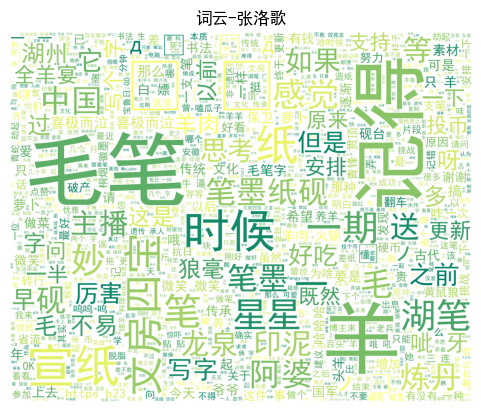

In [6]:
import jieba
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS



wordList = " ".join(jieba.lcut(string))

cloud = WordCloud(
    width=2000,height=1600
    , background_color="white"
    , mode='RGB'
    # , mask=backgroundImg
    , max_words=1000
    , max_font_size=350
    , font_path=r'C:\Windows\Fonts\simhei.ttf'  # 必须要添加中文字体地址,否则会生成方框
    , relative_scaling=0.6
    , random_state=50
    ,colormap='summer'
    , stopwords=STOPWORDS.update(
        ['我', '了', '在', '和', '是', '作者', '中', '那', '也', '里', '没有', '着', '都', '但', '被', '到', '与', '使',
         '很', '像', '说', '啊', '把', '又', '他', '之', 'w', 'W', '的', '你们', '你', '我们', '上', '而', '这','南翔','可以','doge','就','系列','视频','东西','人','吗','打','call','热词','真的','博主','用','美食','做','不是' ,'吧','吃','至尊','脱单','为什么','至尊','看','然后','大','辣','眼睛','不','看','主','现在','会','什么','主','就是','哭','笑','能','知道','来','所以','好像','因为','区','个','没','朋友','不能','还','以为','有','想','居然','已经','出来','再','才','这个','这次','喜欢','有','屁','看到','给','这种','一','cry','帮忙','下','下次','自己','一定','这样','太','让','吃瓜','需要','觉得','找','呢','每次','更多','剩下','有人','叫','直接','还是','真','一直','呲牙','后面','需要','觉得','代替'
         '一个','好','可能','下期','tv','从','对','买','滑稽','一个','怎么','那个','薅','羊毛','热乎','谁','要','做饭','回复','可能','心心','奢侈品','评论','三连','不爱','吃饭','啦','这么','得','眼','斜眼','还有','大大','应该','不会','跟','或者','去','知识','的话','烤全羊','完','啥','手工','怎么样','最后','是不是','关注','忘','写','开始','到底','变成','呲牙','大哭','一只'])
).generate(wordList)

plt.imshow(cloud)
plt.axis("off")
plt.title("词云-张洛歌")
plt.show()

cloud.to_file("output\\20230423\\bilibili_cloud.jpg")

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题with open('output/0415.txt','w',encoding='utf-8') as f:
    for i in li:
        f.write(i+'\n')

In [ ]:
y = 1241
type(y) == float

In [ ]:
import numpy as np
c = 3e8
_lambda = np.array([365.0,404.7,435.8,546.1,577.0])
_lambda *= 1e-9
f = c/_lambda

In [ ]:
f*f

In [ ]:
f_f_bar = sum(f*f)/5
f*f

In [ ]:
f_bar = sum(f)/f.shape[0]

In [ ]:
# (1.66+1.17+0.91+0.45+0.3)/5
v = np.array([-1.66,-1.17,-0.91,-0.45,-0.3])
v_bar = -np.sum(v)/5
v_bar

In [ ]:
f_v_bar = np.sum(f*v)/5

In [ ]:
k = (f_bar*v_bar - f_v_bar)/(f_bar**2 - f_f_bar)

In [ ]:
k

In [ ]:
e = 1.6021766208e-19
h = k*e

In [ ]:
h

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(f.reshape(-1,1),v.reshape(-1,1))

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
plt.plot(v,f)

In [ ]:
k = linreg.coef_
k

In [ ]:
h = k*e

In [ ]:
h

In [ ]:
(6.626 - 6.838)/6.626

In [ ]:
linreg.intercept_

In [ ]:


U_1 = np.array([-2,-1.8,-1.6,-1.4,-1.2,-1.145,-1.0,-0.8,-0.6,-0.4,-0.2,0,0.25,0.5,0.75,1.0,1.25,1.5,1.75])
U_2 = np.array([-2,-1.8,-1.6,-1.4,-1.2,-1.170,-1.0,-0.8,-0.6,-0.4,-0.2,0,0.25,0.5,0.75,1.0,1.25,1.5,1.75])

I_1 = np.array([-1.0,-0.9,-0.8,-0.7,-0.2,0,1.7,6.7,14.1,23.2,33.7,45.8,62.6,81.3,101.5,123.2,146.5,170.5,196])
plt.plot(U_1,I_1)
plt.xlabel("$U_{ka}(v)$")
plt.ylabel("$I(10^{-12}A)$")
plt.title("$\lambda = 435nm, \phi = 4mm$")

In [ ]:
I_2 = np.array([-3.2,-3.0,-2.7,-2.2,-0.3,0,7.5,27.1,56.6,94.6,138.4,187.9,293,370,454,543,637,735,839])
plt.plot(U_2,I_2)

plt.xlabel("$U_{ka}(V)$")
plt.ylabel("$I(10^{-12}A$")
plt.title("$\lambda = 435nm,\phi=8mm$")